In [1]:
import sys, datetime
from qick.asm_v2 import QickSweep1D

sys.path.append("../Libraries") # replace this with your location of the Libraries folder
from rabi_gain import *

No module named 'visa'
Warning VISA library import failed
Warning serial library import failed.
Could not load Autonics TM4 Driver


  0%|          | 0/80000 [00:00<?, ?it/s]

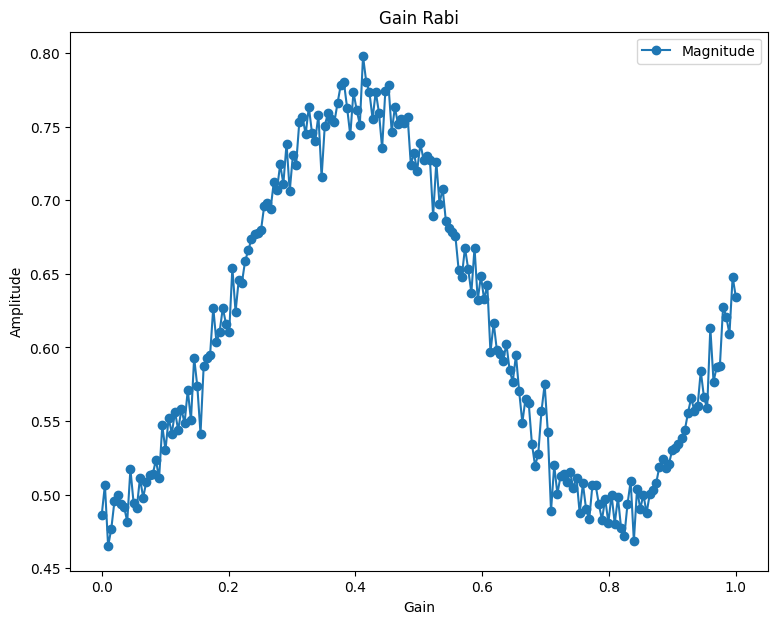

In [16]:
date = str(datetime.datetime.now().strftime('%Y_%m_%d'))
time = str(datetime.datetime.now().strftime('%H;%M;%S'))

datapath = f'G:\\My Drive\\chatot\\data\\rabi_gain\\{date}\\{time}\\' # replace this with your data location

config_file = f"..\\..\\..\\..\\cfg\\llosta.json" # replace this with your config

meas = rabi_gain(path=datapath, config_file=config_file)

min_gain = 0
max_gain = 1

meas.cfg.expt = {
    "n_avg": 400,
    "res_freq": 5990.45,
    "res_gain": 0.03,
    "res_pulse_len": 5, 
    "res_phase": 0,
    "qubit_pulse_len": 0.206, 
    "qubit_gain": QickSweep1D('gain_loop', min_gain, max_gain),
    "qubit_freq": 4277.3,
    "qubit_phase": 0,
    "trig_offset": 0.5,
    "relaxation_time": 200,
    "steps": 200,
    "min_gain": min_gain,
    "max_gain": max_gain,
}

meas.acquire()
meas.display(save=False)
#meas.savedata()